In [451]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
from sklearn.impute import SimpleImputer

In [452]:
train_df = pd.read_csv('./datasets/train.csv')
test_df = pd.read_csv('./datasets/test.csv')
train_df

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      109  533352170           60        RL           NaN     13517   Pave   
1      544  531379050           60        RL          43.0     11492   Pave   
2      153  535304180           20        RL          68.0      7922   Pave   
3      318  916386060           60        RL          73.0      9802   Pave   
4      255  906425045           50        RL          82.0     14235   Pave   
...    ...        ...          ...       ...           ...       ...    ...   
2046  1587  921126030           20        RL          79.0     11449   Pave   
2047   785  905377130           30        RL           NaN     12342   Pave   
2048   916  909253010           50        RL          57.0      7558   Pave   
2049   639  535179160           20        RL          80.0     10400   Pave   
2050    10  527162130           60        RL          60.0      7500   Pave   

     Alley Lot Shape Land Contour Utilities Lot Config Land Slope  \
0      NaN       IR1          Lvl    AllPub    CulDSac        Gtl   
1      NaN       IR1          Lvl    AllPub    CulDSac        Gtl   
2      NaN       Reg          Lvl    AllPub     Inside        Gtl   
3      NaN       Reg          Lvl    AllPub     Inside        Gtl   
4      NaN       IR1          Lvl    AllPub     Inside        Gtl   
...    ...       ...          ...       ...        ...        ...   
2046   NaN       IR1          HLS    AllPub     Inside        Gtl   
2047   NaN       IR1          Lvl    AllPub     Inside        Gtl   
2048   NaN       Reg          Bnk    AllPub     Inside        Gtl   
2049   NaN       Reg          Lvl    AllPub     Corner        Gtl   
2050   NaN       Reg          Lvl    AllPub     Inside        Gtl   

     Neighborhood Condition 1 Condition 2 Bldg Type House Style  Overall Qual  \
0          Sawyer        RRAe        Norm      1Fam      2Story             6   
1         SawyerW        Norm        Norm      1Fam      2Story             7   
2           NAmes        Norm        Norm      1Fam      1Story             5   
3          Timber        Norm        Norm      1Fam      2Story             5   
4         SawyerW        Norm        Norm      1Fam      1.5Fin             6   
...           ...         ...         ...       ...         ...           ...   
2046       Timber        Norm        Norm      1Fam      1Story             8   
2047      Edwards        Norm        Norm      1Fam      1Story             4   
2048      Crawfor        Norm        Norm      1Fam      1.5Fin             6   
2049        NAmes        Norm        Norm      1Fam      1Story             4   
2050      Gilbert        Norm        Norm      1Fam      2Story             7   

      Overall Cond  Year Built  Year Remod/Add Roof Style Roof Matl  \
0                8        1976            2005      Gable   CompShg   
1                5        1996            1997      Gable   CompShg   
2                7        1953            2007      Gable   CompShg   
3                5        2006            2007      Gable   CompShg   
4                8        1900            1993      Gable   CompShg   
...            ...         ...             ...        ...       ...   
2046             5        2007            2007      Gable   CompShg   
2047             5        1940            1950      Gable   CompShg   
2048             6        1928            1950      Gable   CompShg   
2049             5        1956            1956      Gable   CompShg   
2050             5        1999            1999      Gable   CompShg   

     Exterior 1st Exterior 2nd Mas Vnr Type  Mas Vnr Area Exter Qual  \
0         HdBoard      Plywood      BrkFace         289.0         Gd   
1         VinylSd      VinylSd      BrkFace         132.0         Gd   
2         VinylSd      VinylSd         None           0.0         TA   
3         VinylSd      VinylSd         None           0.0         TA   
4         Wd Sdng      Plywood         None 

In [453]:
test_df

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0    2658  902301120          190        RM          69.0      9142   Pave   
1    2718  905108090           90        RL           NaN      9662   Pave   
2    2414  528218130           60        RL          58.0     17104   Pave   
3    1989  902207150           30        RM          60.0      8520   Pave   
4     625  535105100           20        RL           NaN      9500   Pave   
..    ...        ...          ...       ...           ...       ...    ...   
873  1662  527377110           60        RL          80.0      8000   Pave   
874  1234  535126140           60        RL          90.0     14670   Pave   
875  1373  904100040           20        RL          55.0      8250   Pave   
876  1672  527425140           20        RL          60.0      9000   Pave   
877  1939  535327160           20        RL          70.0      8400   Pave   

    Alley Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
0    Grvl       Reg          Lvl    AllPub     Inside        Gtl      OldTown   
1     NaN       IR1          Lvl    AllPub     Inside        Gtl       Sawyer   
2     NaN       IR1          Lvl    AllPub     Inside        Gtl      Gilbert   
3     NaN       Reg          Lvl    AllPub     Inside        Gtl      OldTown   
4     NaN       IR1          Lvl    AllPub     Inside        Gtl        NAmes   
..    ...       ...          ...       ...        ...        ...          ...   
873   NaN       Reg          Lvl    AllPub     Inside        Gtl       NWAmes   
874   NaN       Reg          Lvl    AllPub     Inside        Gtl        NAmes   
875   NaN       Reg          Lvl    AllPub     Inside        Gtl       Sawyer   
876   NaN       Reg          Lvl    AllPub        FR2        Gtl        NAmes   
877   NaN       Reg          Lvl    AllPub     Corner        Gtl        NAmes   

    Condition 1 Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  \
0          Norm        Norm    2fmCon      2Story             6             8   
1          Norm        Norm    Duplex      1Story             5             4   
2          Norm        Norm      1Fam      2Story             7             5   
3          Norm        Norm      1Fam      1Story             5             6   
4          Norm        Norm      1Fam      1Story             6             5   
..          ...         ...       ...         ...           ...           ...   
873        PosN        Norm      1Fam      2Story             6             6   
874        Norm        Norm      1Fam      2Story             6             7   
875       Feedr        Norm      1Fam      1Story             5             5   
876        Norm        Norm      1Fam      1Story             4             6   
877        Norm        Norm      1Fam      1Story             5             5   

     Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st  \
0          1910            1950      Gable   CompShg      AsbShng   
1          1977            1977      Gable   CompShg      Plywood   
2          2006            2006      Gable   CompShg      VinylSd   
3          1923            2006      Gable   CompShg      Wd Sdng   
4          1963            1963      Gable   CompShg      Plywood   
..          ...             ...        ...       ...          ...   
873        1974            1974      Gable   CompShg      HdBoard   
874        1966            1999      Gable   CompShg      VinylSd   
875        1968            1968        Hip   CompShg      HdBoard   
876        1971            1971      Gable   CompShg      HdBoard   
877        1955            1955      Gable   CompShg      MetalSd   

    Exterior 2nd Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation  \
0        AsbShng         None           0.0         TA         Fa      Stone   
1        Plywood         None           0.0         TA         TA     CBlock   
2        VinylSd         None           0.0         Gd 

In [454]:
pd.set_option('display.max_columns', 81)
# code taken from https://stackoverflow.com/questions/11707586/how-do-i-expand-the-output-display-to-see-more-columns-of-a-pandas-dataframe

In [455]:
train_df.columns = [col.replace(' ', '_').lower() for col in train_df.columns]
test_df.columns = [col.replace(' ', '_').lower() for col in test_df.columns]
train_df.head()

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street alley  \
0  109  533352170           60        RL           NaN     13517   Pave   NaN   
1  544  531379050           60        RL          43.0     11492   Pave   NaN   
2  153  535304180           20        RL          68.0      7922   Pave   NaN   
3  318  916386060           60        RL          73.0      9802   Pave   NaN   
4  255  906425045           50        RL          82.0     14235   Pave   NaN   

  lot_shape land_contour utilities lot_config land_slope neighborhood  \
0       IR1          Lvl    AllPub    CulDSac        Gtl       Sawyer   
1       IR1          Lvl    AllPub    CulDSac        Gtl      SawyerW   
2       Reg          Lvl    AllPub     Inside        Gtl        NAmes   
3       Reg          Lvl    AllPub     Inside        Gtl       Timber   
4       IR1          Lvl    AllPub     Inside        Gtl      SawyerW   

  condition_1 condition_2 bldg_type house_style  overall_qual  overall_cond  \
0        RRAe        Norm      1Fam      2Story             6             8   
1        Norm        Norm      1Fam      2Story             7             5   
2        Norm        Norm      1Fam      1Story             5             7   
3        Norm        Norm      1Fam      2Story             5             5   
4        Norm        Norm      1Fam      1.5Fin             6             8   

   year_built  year_remod/add roof_style roof_matl exterior_1st exterior_2nd  \
0        1976            2005      Gable   CompShg      HdBoard      Plywood   
1        1996            1997      Gable   CompShg      VinylSd      VinylSd   
2        1953            2007      Gable   CompShg      VinylSd      VinylSd   
3        2006            2007      Gable   CompShg      VinylSd      VinylSd   
4        1900            1993      Gable   CompShg      Wd Sdng      Plywood   

  mas_vnr_type  mas_vnr_area exter_qual exter_cond foundation bsmt_qual  \
0      BrkFace         289.0         Gd         TA     CBlock        TA   
1      BrkFace         132.0         Gd         TA      PConc        Gd   
2         None           0.0         TA         Gd     CBlock        TA   
3         None           0.0         TA         TA      PConc        Gd   
4         None           0.0         TA         TA      PConc        Fa   

  bsmt_cond bsmt_exposure bsmtfin_type_1  bsmtfin_sf_1 bsmtfin_type_2  \
0        TA            No            GLQ         533.0            Unf   
1        TA            No            GLQ         637.0            Unf   
2        TA            No            GLQ         731.0            Unf   
3        TA            No            Unf           0.0            Unf   
4        Gd            No            Unf           0.0            Unf   

   bsmtfin_sf_2  bsmt_unf_sf  total_bsmt_sf heating heating_qc central_air  \
0           0.0        192.0          725.0    GasA         Ex           Y   
1           0.0        276.0          913.0    GasA         Ex           Y   
2           0.0        326.0         1057.0    GasA         TA           Y   
3           0.0        384.0          384.0    GasA         Gd           Y   
4           0.0        676.0          676.0    GasA         TA           Y   

  electrical  1st_flr_sf  2nd_flr_sf  low_qual_fin_sf  gr_liv_area  \
0      SBrkr         725         754                0         1479   
1      SBrkr         913        1209                0         2122   
2      SBrkr        1057           0                0         1057   
3      SBrkr         744         700                0         1444   
4      SBrkr         831         614                0         1445   

   bsmt_full_bath  bsmt_half_bath  full_bath  half_bath  bedroom_abvgr  \
0             0.0             0.0          2          1              3   
1             1.0             0.0          2          1              4   
2             1.0             0.0          1          0              3   
3             0.0             0.0          2  

In [456]:
test_df.head()

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street  \
0  2658  902301120          190        RM          69.0      9142   Pave   
1  2718  905108090           90        RL           NaN      9662   Pave   
2  2414  528218130           60        RL          58.0     17104   Pave   
3  1989  902207150           30        RM          60.0      8520   Pave   
4   625  535105100           20        RL           NaN      9500   Pave   

  alley lot_shape land_contour utilities lot_config land_slope neighborhood  \
0  Grvl       Reg          Lvl    AllPub     Inside        Gtl      OldTown   
1   NaN       IR1          Lvl    AllPub     Inside        Gtl       Sawyer   
2   NaN       IR1          Lvl    AllPub     Inside        Gtl      Gilbert   
3   NaN       Reg          Lvl    AllPub     Inside        Gtl      OldTown   
4   NaN       IR1          Lvl    AllPub     Inside        Gtl        NAmes   

  condition_1 condition_2 bldg_type house_style  overall_qual  overall_cond  \
0        Norm        Norm    2fmCon      2Story             6             8   
1        Norm        Norm    Duplex      1Story             5             4   
2        Norm        Norm      1Fam      2Story             7             5   
3        Norm        Norm      1Fam      1Story             5             6   
4        Norm        Norm      1Fam      1Story             6             5   

   year_built  year_remod/add roof_style roof_matl exterior_1st exterior_2nd  \
0        1910            1950      Gable   CompShg      AsbShng      AsbShng   
1        1977            1977      Gable   CompShg      Plywood      Plywood   
2        2006            2006      Gable   CompShg      VinylSd      VinylSd   
3        1923            2006      Gable   CompShg      Wd Sdng      Wd Sdng   
4        1963            1963      Gable   CompShg      Plywood      Plywood   

  mas_vnr_type  mas_vnr_area exter_qual exter_cond foundation bsmt_qual  \
0         None           0.0         TA         Fa      Stone        Fa   
1         None           0.0         TA         TA     CBlock        Gd   
2         None           0.0         Gd         TA      PConc        Gd   
3         None           0.0         Gd         TA     CBlock        TA   
4      BrkFace         247.0         TA         TA     CBlock        Gd   

  bsmt_cond bsmt_exposure bsmtfin_type_1  bsmtfin_sf_1 bsmtfin_type_2  \
0        TA            No            Unf             0            Unf   
1        TA            No            Unf             0            Unf   
2        Gd            Av            GLQ           554            Unf   
3        TA            No            Unf             0            Unf   
4        TA            No            BLQ           609            Unf   

   bsmtfin_sf_2  bsmt_unf_sf  total_bsmt_sf heating heating_qc central_air  \
0             0         1020           1020    GasA         Gd           N   
1             0         1967           1967    GasA         TA           Y   
2             0          100            654    GasA         Ex           Y   
3             0          968            968    GasA         TA           Y   
4             0          785           1394    GasA         Gd           Y   

  electrical  1st_flr_sf  2nd_flr_sf  low_qual_fin_sf  gr_liv_area  \
0      FuseP         908        1020                0         1928   
1      SBrkr        1967           0                0         1967   
2      SBrkr         664         832                0         1496   
3      SBrkr         968           0                0          968   
4      SBrkr        1394           0                0         1394   

   bsmt_full_bath  bsmt_half_bath  full_bath  half_bath  bedroom_abvgr  \
0               0               0          2          0              4   
1               0               0          2          0              6   
2               1               0          2          1              3   
3               0               0        

# First goal to get rid of nulls

In [457]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2051 non-null   int64  
 1   pid              2051 non-null   int64  
 2   ms_subclass      2051 non-null   int64  
 3   ms_zoning        2051 non-null   object 
 4   lot_frontage     1721 non-null   float64
 5   lot_area         2051 non-null   int64  
 6   street           2051 non-null   object 
 7   alley            140 non-null    object 
 8   lot_shape        2051 non-null   object 
 9   land_contour     2051 non-null   object 
 10  utilities        2051 non-null   object 
 11  lot_config       2051 non-null   object 
 12  land_slope       2051 non-null   object 
 13  neighborhood     2051 non-null   object 
 14  condition_1      2051 non-null   object 
 15  condition_2      2051 non-null   object 
 16  bldg_type        2051 non-null   object 
 17  house_style   

In [458]:
train_nulls = train_df.isnull().sum()
train_nulls.sort_values(ascending=False).head(25)

pool_qc           2042
misc_feature      1986
alley             1911
fence             1651
fireplace_qu      1000
lot_frontage       330
garage_finish      114
garage_qual        114
garage_yr_blt      114
garage_cond        114
garage_type        113
bsmt_exposure       58
bsmtfin_type_2      56
bsmtfin_type_1      55
bsmt_cond           55
bsmt_qual           55
mas_vnr_area        22
mas_vnr_type        22
bsmt_half_bath       2
bsmt_full_bath       2
garage_area          1
total_bsmt_sf        1
bsmt_unf_sf          1
bsmtfin_sf_2         1
bsmtfin_sf_1         1
dtype: int64

In [459]:
test_nulls = test_df.isnull().sum()
test_nulls.sort_values(ascending=False).head(25)

pool_qc           874
misc_feature      837
alley             820
fence             706
fireplace_qu      422
lot_frontage      160
garage_yr_blt      45
garage_finish      45
garage_qual        45
garage_cond        45
garage_type        44
bsmtfin_type_1     25
bsmt_qual          25
bsmt_cond          25
bsmt_exposure      25
bsmtfin_type_2     25
electrical          1
mas_vnr_type        1
mas_vnr_area        1
kitchen_abvgr       0
totrms_abvgrd       0
bedroom_abvgr       0
half_bath           0
full_bath           0
bsmt_half_bath      0
dtype: int64

In [460]:
drop_columns = ['pool_qc', 'misc_feature', 'alley', 'fence', 'fireplace_qu']
train_df.drop(columns=drop_columns, inplace=True)
test_df.drop(columns=drop_columns, inplace=True)
# dropped columns where ~50% of the column where null values

In [461]:
train_df['lot_frontage'].median()

68.0

In [462]:
test_df['lot_frontage'].median()

68.0

In [463]:
train_df['lot_frontage'].fillna(train_df['lot_frontage'].median(), inplace=True)
test_df['lot_frontage'].fillna(test_df['lot_frontage'].median(), inplace=True)
# fix 'lot_frontage' column by setting nulls = median of column

In [464]:
train_df['garage_finish'].value_counts()

Unf    849
RFn    579
Fin    509
Name: garage_finish, dtype: int64

In [465]:
train_df['garage_finish'].fillna('NA', inplace=True)

In [466]:
train_df['garage_finish'].value_counts()

Unf    849
RFn    579
Fin    509
NA     114
Name: garage_finish, dtype: int64

In [467]:
test_df['garage_finish'].value_counts()

Unf    382
RFn    233
Fin    218
Name: garage_finish, dtype: int64

In [468]:
test_df['garage_finish'].fillna('NA', inplace=True)

In [469]:
test_df['garage_finish'].value_counts()

Unf    382
RFn    233
Fin    218
NA      45
Name: garage_finish, dtype: int64

In [470]:
train_df['garage_qual'].value_counts()

TA    1832
Fa      82
Gd      18
Ex       3
Po       2
Name: garage_qual, dtype: int64

In [471]:
train_df['garage_qual'].fillna('NA', inplace=True)

In [472]:
train_df['garage_qual'].value_counts()

TA    1832
NA     114
Fa      82
Gd      18
Ex       3
Po       2
Name: garage_qual, dtype: int64

In [473]:
test_df['garage_qual'].value_counts()

TA    782
Fa     42
Gd      6
Po      3
Name: garage_qual, dtype: int64

In [474]:
test_df['garage_qual'].fillna('NA', inplace=True)

In [475]:
test_df['garage_qual'].value_counts()

TA    782
NA     45
Fa     42
Gd      6
Po      3
Name: garage_qual, dtype: int64

In [476]:
train_df['garage_cond'].value_counts()

TA    1868
Fa      47
Gd      12
Po       8
Ex       2
Name: garage_cond, dtype: int64

In [477]:
train_df['garage_cond'].fillna('NA', inplace=True)

In [478]:
train_df['garage_cond'].value_counts()

TA    1868
NA     114
Fa      47
Gd      12
Po       8
Ex       2
Name: garage_cond, dtype: int64

In [479]:
test_df['garage_cond'].value_counts()

TA    796
Fa     27
Po      6
Gd      3
Ex      1
Name: garage_cond, dtype: int64

In [480]:
test_df['garage_cond'].fillna('NA', inplace=True)

In [481]:
test_df['garage_cond'].value_counts()

TA    796
NA     45
Fa     27
Po      6
Gd      3
Ex      1
Name: garage_cond, dtype: int64

In [482]:
train_df['garage_type'].value_counts()

Attchd     1213
Detchd      536
BuiltIn     132
Basment      27
2Types       19
CarPort      11
Name: garage_type, dtype: int64

In [483]:
train_df['garage_type'].fillna('NA', inplace=True)

In [484]:
train_df['garage_type'].value_counts()

Attchd     1213
Detchd      536
BuiltIn     132
NA          113
Basment      27
2Types       19
CarPort      11
Name: garage_type, dtype: int64

In [485]:
test_df['garage_type'].value_counts()

Attchd     518
Detchd     246
BuiltIn     53
Basment      9
2Types       4
CarPort      4
Name: garage_type, dtype: int64

In [486]:
test_df['garage_type'].fillna('NA', inplace=True)

In [487]:
test_df['garage_type'].value_counts()

Attchd     518
Detchd     246
BuiltIn     53
NA          44
Basment      9
2Types       4
CarPort      4
Name: garage_type, dtype: int64

In [488]:
train_df.loc[(train_df['garage_yr_blt'].isnull() == True) & (train_df['garage_type'] != 'NA'), 'garage_type'] = 'NA'
# row matched with other rows with no garage, changed garage type to NA to match with rest of data in row

In [489]:
test_df.loc[(test_df['garage_yr_blt'].isnull() == True) & (test_df['garage_type'] != 'NA'), 'garage_type'] = 'NA'

In [490]:
train_df['garage_yr_blt'].fillna(train_df['garage_yr_blt'].median(), inplace=True)

In [491]:
test_df['garage_yr_blt'].fillna(test_df['garage_yr_blt'].median(), inplace=True)

In [492]:
train_nulls = train_df.isnull().sum()
train_nulls.sort_values(ascending=False).head(25)

bsmt_exposure      58
bsmtfin_type_2     56
bsmt_cond          55
bsmt_qual          55
bsmtfin_type_1     55
mas_vnr_type       22
mas_vnr_area       22
bsmt_full_bath      2
bsmt_half_bath      2
garage_cars         1
garage_area         1
total_bsmt_sf       1
bsmtfin_sf_1        1
bsmtfin_sf_2        1
bsmt_unf_sf         1
kitchen_qual        0
full_bath           0
half_bath           0
bedroom_abvgr       0
gr_liv_area         0
low_qual_fin_sf     0
kitchen_abvgr       0
functional          0
totrms_abvgrd       0
1st_flr_sf          0
dtype: int64

In [493]:
test_nulls = test_df.isnull().sum()
test_nulls.sort_values(ascending=False).head(25)

bsmt_cond          25
bsmtfin_type_1     25
bsmt_qual          25
bsmt_exposure      25
bsmtfin_type_2     25
mas_vnr_type        1
mas_vnr_area        1
electrical          1
bsmt_full_bath      0
gr_liv_area         0
totrms_abvgrd       0
low_qual_fin_sf     0
bsmt_half_bath      0
full_bath           0
half_bath           0
2nd_flr_sf          0
1st_flr_sf          0
bedroom_abvgr       0
kitchen_abvgr       0
kitchen_qual        0
id                  0
central_air         0
fireplaces          0
yr_sold             0
mo_sold             0
dtype: int64

In [494]:
train_df['bsmt_exposure'].value_counts()

No    1339
Av     288
Gd     203
Mn     163
Name: bsmt_exposure, dtype: int64

In [495]:
train_df['bsmt_exposure'].fillna('NA', inplace=True)

In [496]:
train_df['bsmt_exposure'].value_counts()

No    1339
Av     288
Gd     203
Mn     163
NA      58
Name: bsmt_exposure, dtype: int64

In [497]:
test_df['bsmt_exposure'].value_counts()

No    567
Av    130
Gd     80
Mn     76
Name: bsmt_exposure, dtype: int64

In [498]:
test_df['bsmt_exposure'].fillna('NA', inplace=True)

In [499]:
test_df['bsmt_exposure'].value_counts()

No    567
Av    130
Gd     80
Mn     76
NA     25
Name: bsmt_exposure, dtype: int64

In [500]:
train_df['bsmtfin_type_2'].value_counts()

Unf    1749
Rec      80
LwQ      60
BLQ      48
ALQ      35
GLQ      23
Name: bsmtfin_type_2, dtype: int64

In [501]:
train_df['bsmtfin_type_2'].fillna('NA', inplace=True)

In [502]:
train_df['bsmtfin_type_2'].value_counts()

Unf    1749
Rec      80
LwQ      60
NA       56
BLQ      48
ALQ      35
GLQ      23
Name: bsmtfin_type_2, dtype: int64

In [503]:
test_df['bsmtfin_type_2'].value_counts()

Unf    749
LwQ     29
Rec     26
BLQ     20
ALQ     18
GLQ     11
Name: bsmtfin_type_2, dtype: int64

In [504]:
test_df['bsmtfin_type_2'].fillna('NA', inplace=True)

In [505]:
test_df['bsmtfin_type_2'].value_counts()

Unf    749
LwQ     29
Rec     26
NA      25
BLQ     20
ALQ     18
GLQ     11
Name: bsmtfin_type_2, dtype: int64

In [506]:
train_df['bsmt_cond'].value_counts()

TA    1834
Gd      89
Fa      65
Po       5
Ex       3
Name: bsmt_cond, dtype: int64

In [507]:
train_df['bsmt_cond'].fillna('NA', inplace=True)

In [508]:
train_df['bsmt_cond'].value_counts()

TA    1834
Gd      89
Fa      65
NA      55
Po       5
Ex       3
Name: bsmt_cond, dtype: int64

In [509]:
test_df['bsmt_cond'].value_counts()

TA    781
Fa     39
Gd     33
Name: bsmt_cond, dtype: int64

In [510]:
test_df['bsmt_cond'].fillna('NA', inplace=True)

In [511]:
test_df['bsmt_cond'].value_counts()

TA    781
Fa     39
Gd     33
NA     25
Name: bsmt_cond, dtype: int64

In [512]:
train_df['bsmt_qual'].value_counts()

TA    887
Gd    864
Ex    184
Fa     60
Po      1
Name: bsmt_qual, dtype: int64

In [513]:
train_df['bsmt_qual'].fillna('NA', inplace=True)

In [514]:
train_df['bsmt_qual'].value_counts()

TA    887
Gd    864
Ex    184
Fa     60
NA     55
Po      1
Name: bsmt_qual, dtype: int64

In [515]:
test_df['bsmt_qual'].value_counts()

TA    396
Gd    355
Ex     73
Fa     28
Po      1
Name: bsmt_qual, dtype: int64

In [516]:
test_df['bsmt_qual'].fillna('NA', inplace=True)

In [517]:
test_df['bsmt_qual'].value_counts()

TA    396
Gd    355
Ex     73
Fa     28
NA     25
Po      1
Name: bsmt_qual, dtype: int64

In [518]:
train_df['bsmtfin_type_1'].value_counts()

GLQ    615
Unf    603
ALQ    293
BLQ    200
Rec    183
LwQ    102
Name: bsmtfin_type_1, dtype: int64

In [519]:
train_df['bsmtfin_type_1'].fillna('NA', inplace=True)

In [520]:
train_df['bsmtfin_type_1'].value_counts()

GLQ    615
Unf    603
ALQ    293
BLQ    200
Rec    183
LwQ    102
NA      55
Name: bsmtfin_type_1, dtype: int64

In [521]:
test_df['bsmtfin_type_1'].value_counts()

Unf    248
GLQ    243
ALQ    136
Rec    105
BLQ     69
LwQ     52
Name: bsmtfin_type_1, dtype: int64

In [522]:
test_df['bsmtfin_type_1'].fillna('NA', inplace=True)

In [523]:
test_df['bsmtfin_type_1'].value_counts()

Unf    248
GLQ    243
ALQ    136
Rec    105
BLQ     69
LwQ     52
NA      25
Name: bsmtfin_type_1, dtype: int64

In [524]:
train_nulls = train_df.isnull().sum()
train_nulls.sort_values(ascending=False).head(15)

mas_vnr_type       22
mas_vnr_area       22
bsmt_half_bath      2
bsmt_full_bath      2
garage_cars         1
garage_area         1
total_bsmt_sf       1
bsmtfin_sf_1        1
bsmtfin_sf_2        1
bsmt_unf_sf         1
low_qual_fin_sf     0
gr_liv_area         0
functional          0
full_bath           0
half_bath           0
dtype: int64

In [525]:
test_nulls = test_df.isnull().sum()
test_nulls.sort_values(ascending=False).head(10)

electrical       1
mas_vnr_type     1
mas_vnr_area     1
id               0
full_bath        0
totrms_abvgrd    0
kitchen_qual     0
kitchen_abvgr    0
bedroom_abvgr    0
half_bath        0
dtype: int64

In [526]:
train_df.loc[(train_df['mas_vnr_type'].isnull() == True), 'mas_vnr_type'] = 'Unknwn'

In [527]:
train_df['mas_vnr_type'].isnull().sum()

0

In [528]:
test_df.loc[(test_df['mas_vnr_type'].isnull() == True), 'mas_vnr_type'] = 'Unknwn'

In [529]:
test_df['mas_vnr_type'].isnull().sum()

0

In [530]:
train_df['mas_vnr_area'].fillna(train_df['mas_vnr_area'].median(), inplace=True)

In [531]:
test_df['mas_vnr_area'].fillna(test_df['mas_vnr_area'].median(), inplace=True)

In [532]:
train_nulls = train_df.isnull().sum()
train_nulls.sort_values(ascending=False).head(15)

bsmt_full_bath     2
bsmt_half_bath     2
bsmtfin_sf_1       1
garage_cars        1
garage_area        1
total_bsmt_sf      1
bsmtfin_sf_2       1
bsmt_unf_sf        1
1st_flr_sf         0
2nd_flr_sf         0
low_qual_fin_sf    0
gr_liv_area        0
functional         0
electrical         0
full_bath          0
dtype: int64

In [533]:
train_df.dropna(inplace=True)

In [534]:
test_nulls = test_df.isnull().sum()
test_nulls.sort_values(ascending=False).head(15)

electrical         1
id                 0
bsmt_half_bath     0
totrms_abvgrd      0
kitchen_qual       0
kitchen_abvgr      0
bedroom_abvgr      0
half_bath          0
full_bath          0
bsmt_full_bath     0
fireplaces         0
gr_liv_area        0
low_qual_fin_sf    0
2nd_flr_sf         0
1st_flr_sf         0
dtype: int64

In [535]:
test_df[test_df['electrical'].isnull() == True]  
# cannot find way to rid null value
# will not use electrical column as feature in model

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street  \
634  1578  916386080           80        RL          73.0      9735   Pave   

    lot_shape land_contour utilities lot_config land_slope neighborhood  \
634       Reg          Lvl    AllPub     Inside        Gtl       Timber   

    condition_1 condition_2 bldg_type house_style  overall_qual  overall_cond  \
634        Norm        Norm      1Fam        SLvl             5             5   

     year_built  year_remod/add roof_style roof_matl exterior_1st  \
634        2006            2007      Gable   CompShg      VinylSd   

    exterior_2nd mas_vnr_type  mas_vnr_area exter_qual exter_cond foundation  \
634      VinylSd         None           0.0         TA         TA      PConc   

    bsmt_qual bsmt_cond bsmt_exposure bsmtfin_type_1  bsmtfin_sf_1  \
634        Gd        TA            No            Unf             0   

    bsmtfin_type_2  bsmtfin_sf_2  bsmt_unf_sf  total_bsmt_sf heating  \
634            Unf             0          384            384    GasA   

    heating_qc central_air electrical  1st_flr_sf  2nd_flr_sf  \
634         Gd           Y        NaN         754         640   

     low_qual_fin_sf  gr_liv_area  bsmt_full_bath  bsmt_half_bath  full_bath  \
634                0         1394               0               0          2   

     half_bath  bedroom_abvgr  kitchen_abvgr kitchen_qual  totrms_abvgrd  \
634          1              3              1           Gd              7   

    functional  fireplaces garage_type  garage_yr_blt garage_finish  \
634        Typ           0     BuiltIn         2007.0           Fin   

     garage_cars  garage_area garage_qual garage_cond paved_drive  \
634            2          400          TA          TA           Y   

     wood_deck_sf  open_porch_sf  enclosed_porch  3ssn_porch  screen_porch  \
634           100              0               0           0             0   

     pool_area  misc_val  mo_sold  yr_sold sale_type  
634          0         0        5     2008       WD

<AxesSubplot:>

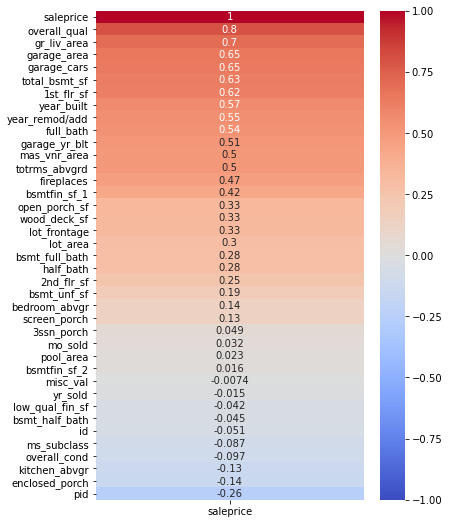

In [536]:
plt.figure(figsize=(6,9))
sns.heatmap(train_df.corr()[['saleprice']].sort_values('saleprice', ascending=False),
           annot=True,
           cmap='coolwarm',
           vmin=-1,
           vmax=1)

# 2nd goal is to create dummies for columns that will be features

In [537]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2048 entries, 0 to 2050
Data columns (total 76 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2048 non-null   int64  
 1   pid              2048 non-null   int64  
 2   ms_subclass      2048 non-null   int64  
 3   ms_zoning        2048 non-null   object 
 4   lot_frontage     2048 non-null   float64
 5   lot_area         2048 non-null   int64  
 6   street           2048 non-null   object 
 7   lot_shape        2048 non-null   object 
 8   land_contour     2048 non-null   object 
 9   utilities        2048 non-null   object 
 10  lot_config       2048 non-null   object 
 11  land_slope       2048 non-null   object 
 12  neighborhood     2048 non-null   object 
 13  condition_1      2048 non-null   object 
 14  condition_2      2048 non-null   object 
 15  bldg_type        2048 non-null   object 
 16  house_style      2048 non-null   object 
 17  overall_qual  

In [538]:
train_df['ms_subclass'].unique(), test_df['ms_subclass'].unique()
# will not dummy because it train data will have more columns than test data

(array([ 60,  20,  50, 180, 160,  70, 120, 190,  85,  30,  90,  80,  75,
         45,  40, 150], dtype=int64),
 array([190,  90,  60,  30,  20, 160, 120,  70,  80,  50,  85,  45,  75,
        180,  40], dtype=int64))

In [539]:
train_df['ms_zoning'].unique(), test_df['ms_zoning'].unique()
# will not dummy because it train data will have more columns than test data

(array(['RL', 'RM', 'FV', 'C (all)', 'A (agr)', 'RH', 'I (all)'],
       dtype=object),
 array(['RM', 'RL', 'FV', 'RH', 'C (all)', 'I (all)'], dtype=object))

In [540]:
train_df['street'].unique(), test_df['street'].unique()   # can dummy or make bool

(array(['Pave', 'Grvl'], dtype=object), array(['Pave', 'Grvl'], dtype=object))

In [541]:
train_df['utilities'].unique(), test_df['utilities'].unique()
# will not dummy because it train data will have more columns than test data

(array(['AllPub', 'NoSeWa', 'NoSewr'], dtype=object),
 array(['AllPub', 'NoSewr'], dtype=object))

In [542]:
train_df['neighborhood'].unique(), test_df['neighborhood'].unique()
# will not dummy because it train data will have more columns than test data

(array(['Sawyer', 'SawyerW', 'NAmes', 'Timber', 'Edwards', 'OldTown',
        'BrDale', 'CollgCr', 'Somerst', 'Mitchel', 'StoneBr', 'NridgHt',
        'Gilbert', 'Crawfor', 'IDOTRR', 'NWAmes', 'Veenker', 'MeadowV',
        'SWISU', 'NoRidge', 'ClearCr', 'Blmngtn', 'BrkSide', 'NPkVill',
        'Blueste', 'GrnHill', 'Greens', 'Landmrk'], dtype=object),
 array(['OldTown', 'Sawyer', 'Gilbert', 'NAmes', 'MeadowV', 'CollgCr',
        'Somerst', 'Mitchel', 'SawyerW', 'IDOTRR', 'BrkSide', 'Edwards',
        'ClearCr', 'NWAmes', 'Timber', 'NoRidge', 'NridgHt', 'Crawfor',
        'StoneBr', 'Veenker', 'BrDale', 'SWISU', 'Blmngtn', 'NPkVill',
        'Greens', 'Blueste'], dtype=object))

In [543]:
train_df['bldg_type'].unique(), test_df['bldg_type'].unique() # can dummy

(array(['1Fam', 'TwnhsE', 'Twnhs', '2fmCon', 'Duplex'], dtype=object),
 array(['2fmCon', 'Duplex', '1Fam', 'TwnhsE', 'Twnhs'], dtype=object))

In [544]:
train_df['house_style'].unique(), test_df['house_style'].unique() # can dummy

(array(['2Story', '1Story', '1.5Fin', 'SFoyer', 'SLvl', '2.5Unf', '2.5Fin',
        '1.5Unf'], dtype=object),
 array(['2Story', '1Story', '1.5Fin', 'SLvl', 'SFoyer', '2.5Fin', '2.5Unf',
        '1.5Unf'], dtype=object))

In [545]:
train_df['roof_style'].unique(), test_df['roof_style'].unique() # can dummy

(array(['Gable', 'Hip', 'Flat', 'Mansard', 'Shed', 'Gambrel'], dtype=object),
 array(['Gable', 'Hip', 'Gambrel', 'Flat', 'Mansard', 'Shed'], dtype=object))

In [546]:
train_df['roof_matl'].unique(), test_df['roof_matl'].unique()
# will not dummy because it train data will different columns than test data

(array(['CompShg', 'WdShngl', 'Tar&Grv', 'WdShake', 'Membran', 'ClyTile'],
       dtype=object),
 array(['CompShg', 'Metal', 'WdShake', 'Tar&Grv', 'WdShngl', 'Roll'],
       dtype=object))

In [547]:
train_df['exter_qual'].unique(), test_df['exter_qual'].unique() # need to give ordinal values

(array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object),
 array(['TA', 'Gd', 'Fa', 'Ex'], dtype=object))

In [548]:
train_df['exter_cond'].unique(), test_df['exter_cond'].unique() # need to give ordinal values

(array(['TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object),
 array(['Fa', 'TA', 'Gd', 'Ex', 'Po'], dtype=object))

In [549]:
train_df['foundation'].unique(), test_df['foundation'].unique() # can dummy

(array(['CBlock', 'PConc', 'BrkTil', 'Slab', 'Stone', 'Wood'], dtype=object),
 array(['Stone', 'CBlock', 'PConc', 'BrkTil', 'Slab', 'Wood'], dtype=object))

In [550]:
train_df['bsmt_qual'].unique(), test_df['bsmt_qual'].unique() # need to give ordinal values

(array(['TA', 'Gd', 'Fa', 'NA', 'Ex', 'Po'], dtype=object),
 array(['Fa', 'Gd', 'TA', 'Ex', 'NA', 'Po'], dtype=object))

In [551]:
train_df['bsmt_cond'].unique(), test_df['bsmt_cond'].unique()
# will not dummy because it train data will have more columns than test data

(array(['TA', 'Gd', 'NA', 'Fa', 'Po', 'Ex'], dtype=object),
 array(['TA', 'Gd', 'NA', 'Fa'], dtype=object))

In [552]:
train_df['heating'].unique(), test_df['heating'].unique()
# will not dummy because it train data will have more columns than test data

(array(['GasA', 'GasW', 'Grav', 'Wall', 'OthW'], dtype=object),
 array(['GasA', 'GasW', 'Grav', 'Floor'], dtype=object))

In [553]:
train_df['heating_qc'].unique(), test_df['heating_qc'].unique()
# will not dummy because it train data will have more columns than test data

(array(['Ex', 'TA', 'Gd', 'Fa', 'Po'], dtype=object),
 array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object))

In [554]:
train_df['central_air'].unique(), test_df['central_air'].unique() # can dummy or make bool

(array(['Y', 'N'], dtype=object), array(['N', 'Y'], dtype=object))

In [555]:
train_df['kitchen_qual'].unique(), test_df['kitchen_qual'].unique()
# will not dummy because it test data will have more columns than train data

(array(['Gd', 'TA', 'Fa', 'Ex'], dtype=object),
 array(['Fa', 'TA', 'Gd', 'Ex', 'Po'], dtype=object))

In [556]:
train_df['functional'].unique(), test_df['functional'].unique()
# will not dummy because it train data will have more columns than test data

(array(['Typ', 'Mod', 'Min2', 'Maj1', 'Min1', 'Sev', 'Sal', 'Maj2'],
       dtype=object),
 array(['Typ', 'Min2', 'Min1', 'Mod', 'Maj1', 'Maj2'], dtype=object))

In [557]:
train_df['garage_type'].unique(), test_df['garage_type'].unique() # can dummy

(array(['Attchd', 'Detchd', 'BuiltIn', 'Basment', 'NA', '2Types',
        'CarPort'], dtype=object),
 array(['Detchd', 'Attchd', 'BuiltIn', 'NA', '2Types', 'CarPort',
        'Basment'], dtype=object))

In [558]:
train_df['garage_finish'].unique(), test_df['garage_finish'].unique() # can dummy

(array(['RFn', 'Unf', 'Fin', 'NA'], dtype=object),
 array(['Unf', 'Fin', 'RFn', 'NA'], dtype=object))

In [559]:
train_df['garage_qual'].unique(), test_df['garage_qual'].unique() 
# will not dummy because it train data will have more columns than test data

(array(['TA', 'Fa', 'NA', 'Gd', 'Ex', 'Po'], dtype=object),
 array(['Po', 'TA', 'Fa', 'NA', 'Gd'], dtype=object))

In [560]:
train_df['garage_cond'].unique(), test_df['garage_cond'].unique()  # need to give ordinal values

(array(['TA', 'Fa', 'NA', 'Po', 'Gd', 'Ex'], dtype=object),
 array(['Po', 'TA', 'NA', 'Fa', 'Gd', 'Ex'], dtype=object))

In [561]:
train_df['paved_drive'].unique(), test_df['paved_drive'].unique() # can dummy

(array(['Y', 'N', 'P'], dtype=object), array(['Y', 'N', 'P'], dtype=object))

In [562]:
train_df['sale_type'].unique(), test_df['sale_type'].unique() 
# will not dummy because it test data will have more columns than train data

(array(['WD ', 'New', 'COD', 'ConLD', 'Con', 'CWD', 'Oth', 'ConLI',
        'ConLw'], dtype=object),
 array(['WD ', 'New', 'Con', 'COD', 'VWD', 'CWD', 'ConLD', 'ConLI', 'Oth',
        'ConLw'], dtype=object))

In [563]:
train_df = pd.get_dummies(train_df, columns=['street', 'bldg_type', 'house_style', 'roof_style', 'foundation',
                                            'central_air', 'garage_type', 'garage_finish', 'paved_drive'], 
                         drop_first=True)

test_df = pd.get_dummies(test_df, columns=['street', 'bldg_type', 'house_style', 'roof_style', 'foundation',
                                            'central_air', 'garage_type', 'garage_finish', 'paved_drive'], 
                         drop_first=True)

In [564]:
def ordinal_values(ordinal_cell):
    if ordinal_cell == 'NA':
        return 0
    elif ordinal_cell == 'Po':
        return 1
    elif ordinal_cell == 'Fa':
        return 2
    elif ordinal_cell == 'TA':
        return 3
    elif ordinal_cell == 'Gd':
        return 4
    else:
        return 5

In [565]:
train_df['exter_qual'] = train_df['exter_qual'].map(ordinal_values)
train_df['exter_cond'] = train_df['exter_cond'].map(ordinal_values)
train_df['bsmt_qual'] = train_df['bsmt_qual'].map(ordinal_values)
train_df['garage_cond'] = train_df['garage_cond'].map(ordinal_values)

In [566]:
test_df['exter_qual'] = test_df['exter_qual'].map(ordinal_values)
test_df['exter_cond'] = test_df['exter_cond'].map(ordinal_values)
test_df['bsmt_qual'] = test_df['bsmt_qual'].map(ordinal_values)
test_df['garage_cond'] = test_df['garage_cond'].map(ordinal_values)

<AxesSubplot:>

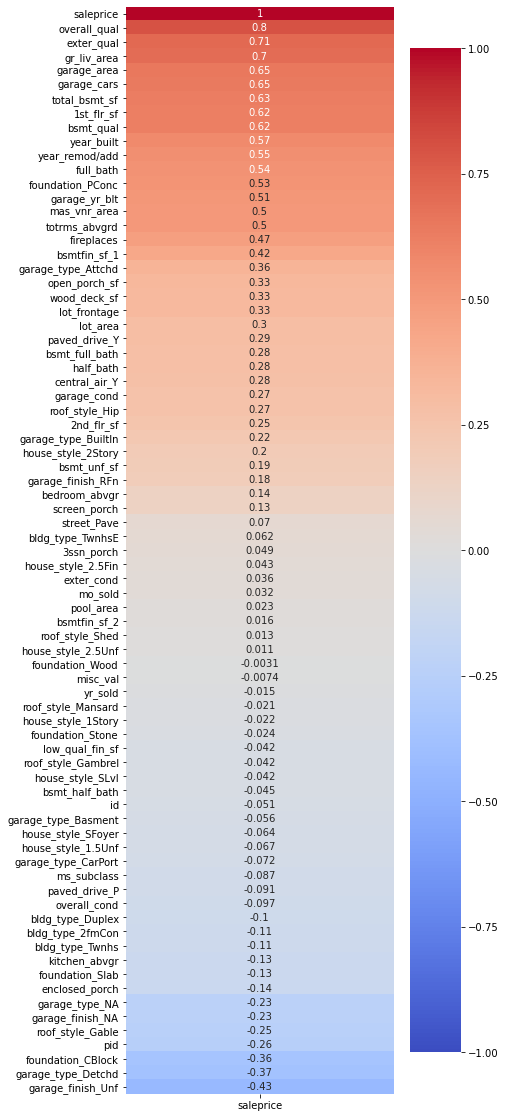

In [567]:
plt.figure(figsize=(6,20))
sns.heatmap(train_df.corr()[['saleprice']].sort_values('saleprice', ascending=False),
           annot=True,
           cmap='coolwarm',
           vmin=-1,
           vmax=1)

In [568]:
train_df.to_csv('./datasets/clean_train.csv', index=False)
test_df.to_csv('./datasets/clean_test.csv', index=False)